# Context and description of the data

### 1. Background information on the subject and field of study. 
The Vinho Verde wine from the Minho region of Portugal accounts for nearly 15% of the total Portuguese wine production and 10% is exported overseas. Three types of variants are typically produced - white, red, and rose; however, for the purpose of our research, we will focus on only the red variant. The data explores various physicochemical properties of white and red variants of the Portuguese “Vinho Verde” wine such as acidity, citric acid, residual sugar, alcohol, and etc. The data also provides sensory data - quality. The output of sensory data (quality) is median of at least 3 professional evaluations from 0 being the worst and 10 being the best. The data consists of 1599 observations and 12 columns.

### 2. Information about data collection. 
The data was collected from May 2004 to February 2007 using only wine samples that were certified by the CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes), an interprofessional organization with the goal of improving the quality and marketing of vinho verde. Certification of produced wines is essential for preventing illegal adulteration of wines (health-safety control) and assuring quality control. The data was recorded directly by the organization through a computerized system, which randomly selected wines for laboratory and sensory analysis from producer requests. The variable ‘quality’ was collected through a minimum of three sensory assessors (using bline tastes), which grades the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The median score of the evaluation was used as the final sensory score. Since the sensory score is based upon subjective testing by selective group(professionals, Portugese) the analysis of data may not apply to general or international population. The data was created to find insights such as trends and patterns that can be used to support the wine market growth in Portugal, more specifically, the wine making (quality) and selling (marketing) processes.

# Purpose
#### The purpose of this project is to determine the predictors that affect the quality of wine, more specifically red wine.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import random

C:\Users\sango\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set Seed
random.seed(10)

### Read in Data

In [3]:
red = pd.read_csv('winequality-red.csv', sep = ';')

#### Subtract Free Sulfur Dioxide from Total Sulfur Dioxide to create a new variable 'Bound sulfur dioxide'.

In [4]:
red['bound sulfur dioxide']  = red['total sulfur dioxide'] - red['free sulfur dioxide']

We create the variable "bound sulfur dioxide" because by defintion of the total added sulfur dioxide, bound sulfur dioxide is the amount of sulfur dioxide that is lost into the wine, and free sulflur dioxide is the active component.

### Summary statistics

In [5]:
red.info()
red.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
bound sulfur dioxide    1599 non-null float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
bound sulfur dioxide    0
dtype: int64

We have a total of 1599 observations with 13 columns (including the newly created column).

In [6]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0


In [7]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,30.592871
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,27.056279
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,12.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,21.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,39.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,251.500000


### Distribution of variables

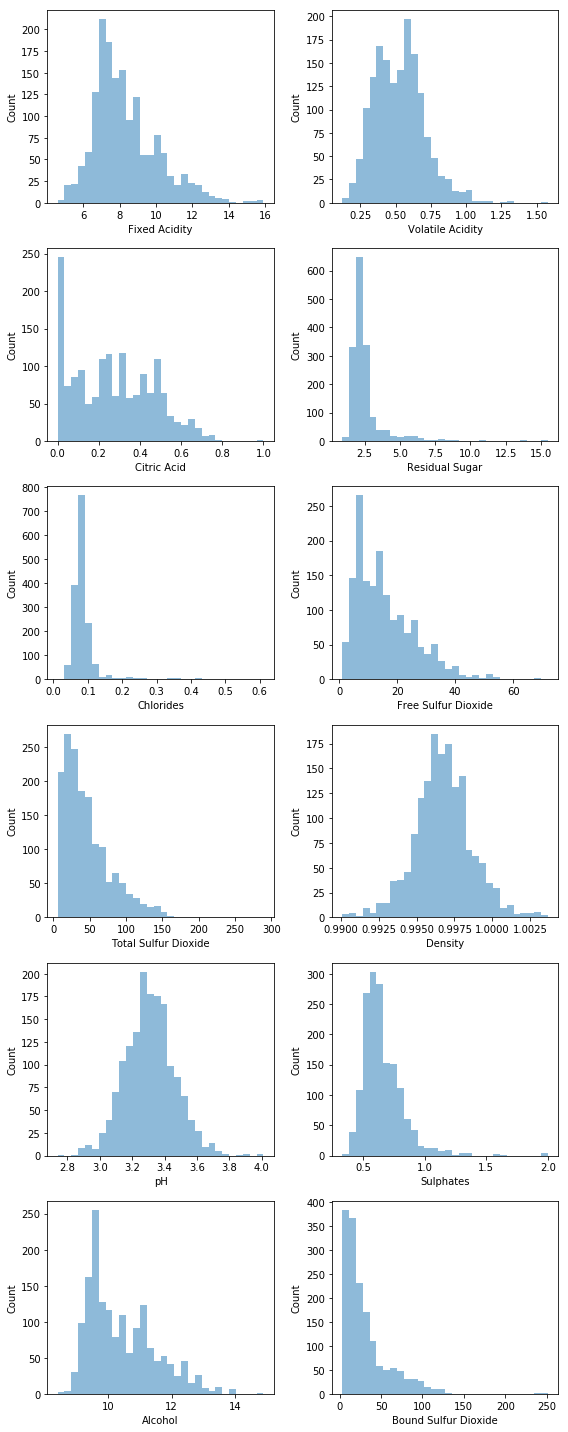

In [8]:
kwargs = dict(histtype = "stepfilled",alpha = 0.5,bins = 30)

fig, axes = plt.subplots(nrows=6, ncols=2, figsize = (8,20))

plt.subplot(6,2,1)
plt.hist("fixed acidity",data = red,**kwargs)
plt.xlabel("Fixed Acidity")
plt.ylabel("Count")

plt.subplot(6,2,2)
plt.hist("volatile acidity",data = red,**kwargs)
plt.xlabel("Volatile Acidity")
plt.ylabel("Count")

plt.subplot(6,2,3)
plt.hist("citric acid",data = red,**kwargs)
plt.xlabel("Citric Acid")
plt.ylabel("Count")

plt.subplot(6,2,4)
plt.hist("residual sugar",data = red,**kwargs)
plt.xlabel("Residual Sugar")
plt.ylabel("Count")

plt.subplot(6,2,5)
plt.hist("chlorides",data = red,**kwargs)
plt.xlabel("Chlorides")
plt.ylabel("Count")

plt.subplot(6,2,6)
plt.hist("free sulfur dioxide",data = red,**kwargs)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Count")

plt.subplot(6,2,7)
plt.hist("total sulfur dioxide",data = red,**kwargs)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Count")

plt.subplot(6,2,8)
plt.hist("density",data = red,**kwargs)
plt.xlabel("Density")
plt.ylabel("Count")

plt.subplot(6,2,9)
plt.hist("pH",data = red,**kwargs)
plt.xlabel("pH")
plt.ylabel("Count")

plt.subplot(6,2,10)
plt.hist("sulphates",data = red,**kwargs)
plt.xlabel("Sulphates")
plt.ylabel("Count")

plt.subplot(6,2,11)
plt.hist("alcohol",data = red,**kwargs)
plt.xlabel("Alcohol")
plt.ylabel("Count")

plt.subplot(6,2,12)
plt.hist("bound sulfur dioxide",data = red,**kwargs)
plt.xlabel("Bound Sulfur Dioxide")
plt.ylabel("Count")

fig.tight_layout()
plt.show()

From the above distribution plots, we can see that only the predictors: fixed acidty, volatile acidty, density, and pH have normal distributions.  
The rest are severly right skewed.  
We will see how log-transformation helps the distributions.  
We won't transform citric acid because citric acid has a lot of 0, and log(0) is undefined.

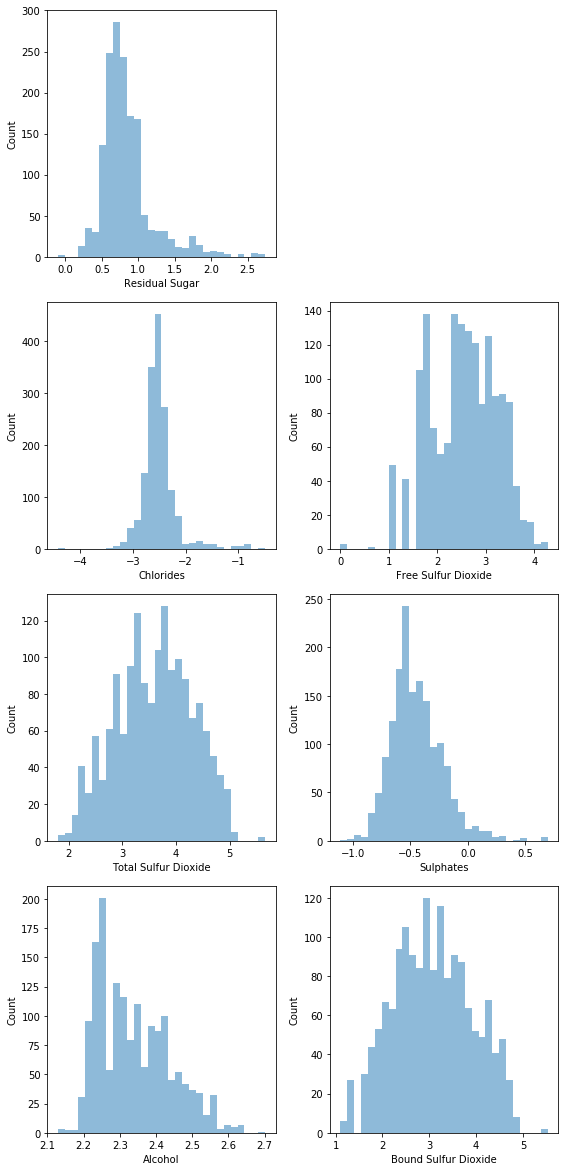

In [9]:
kwargs = dict(histtype = "stepfilled",alpha = 0.5,bins = 30)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize = (8,20))

plt.subplot(5,2,1)
plt.hist(np.log(red["residual sugar"]),**kwargs)
plt.xlabel("Residual Sugar")
plt.ylabel("Count")

plt.subplot(5,2,3)
plt.hist(np.log(red["chlorides"]),**kwargs)
plt.xlabel("Chlorides")
plt.ylabel("Count")

plt.subplot(5,2,4)
plt.hist(np.log(red["free sulfur dioxide"]),**kwargs)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Count")

plt.subplot(5,2,5)
plt.hist(np.log(red["total sulfur dioxide"]),**kwargs)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Count")

plt.subplot(5,2,6)
plt.hist(np.log(red["sulphates"]),**kwargs)
plt.xlabel("Sulphates")
plt.ylabel("Count")

plt.subplot(5,2,7)
plt.hist(np.log(red["alcohol"]),**kwargs)
plt.xlabel("Alcohol")
plt.ylabel("Count")

plt.subplot(5,2,8)
plt.hist(np.log(red["bound sulfur dioxide"]),**kwargs)
plt.xlabel("Bound Sulfur Dioxide")
plt.ylabel("Count")

fig.tight_layout()
plt.show()

The distributions did get way better after log transformation.  
Alcohol's distribution did not change, so it will be better to leave as is.  
We will consider transforming these depending on the type of statistical model we run.

### Distribution of Quality (Outcome Variable)

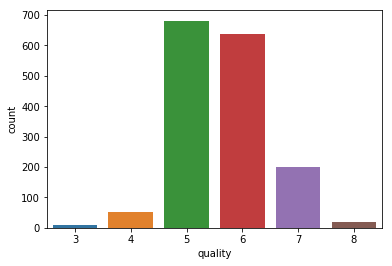

In [10]:
sns.countplot(x = 'quality',data = red)

#### Since the quality is not equally distributed, we are going to group quality into three categories: low, medium, high.

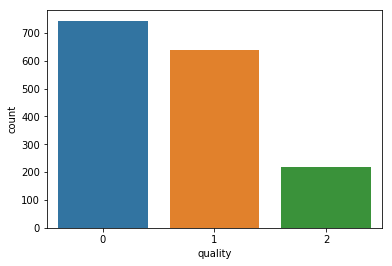

In [11]:
red.quality = red.quality.replace(3,5)
red.quality = red.quality.replace(4,5)
red.quality = red.quality.replace(8,7)
red.quality = red.quality.replace(9,7)
red.quality = red.quality.replace(5,0)
red.quality = red.quality.replace(6,1)
red.quality = red.quality.replace(7,2)
sns.countplot(x = 'quality',data = red)

### Correlation Between Variables

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.126195         -0.360621     0.217913   
bound sulfur dioxide      -0.078149          0.097034     0.066776   

                   

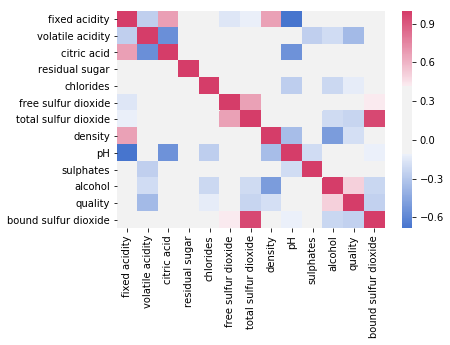

In [12]:
corr = red.corr()
sns.heatmap(corr,cmap = sns.diverging_palette(256,0,sep = 80,n = 7,as_cmap=True))
print(corr)

Based on the above heatmap and correlation matrix:  
We see that alcohol has the strongest correlation (out of the independent variables) with quality, with a correlation coefficient of 0.50.  

Between the independent variables, we can see a strong correlation (greater than 0.5) between:

bound sulfur dioxide and total sulfur dioxide: 0.96  
fixed acidity and pH: -0.68  
fixed acidity and citric acid: 0.67  
fixed acidity and density: 0.67  
free sulfur dioxide and total sulfur dioxide: 0.67  
volatile acidity and citric acid: -0.55  
citric acid and pH: -0.54  

We will remove total sulfur dioxide (from analysis) due to its strong correlation with bound and free sulfur dioxide.  
Bound sulfur dioxide and free sulfur dioxide do not correlate, so they will be better for analysis.

We can see that fixed acidity, citric acid, and pH are strongly correlated to one another.

### Any unusual features or outliers?

#### Box Plot for Each Predictor

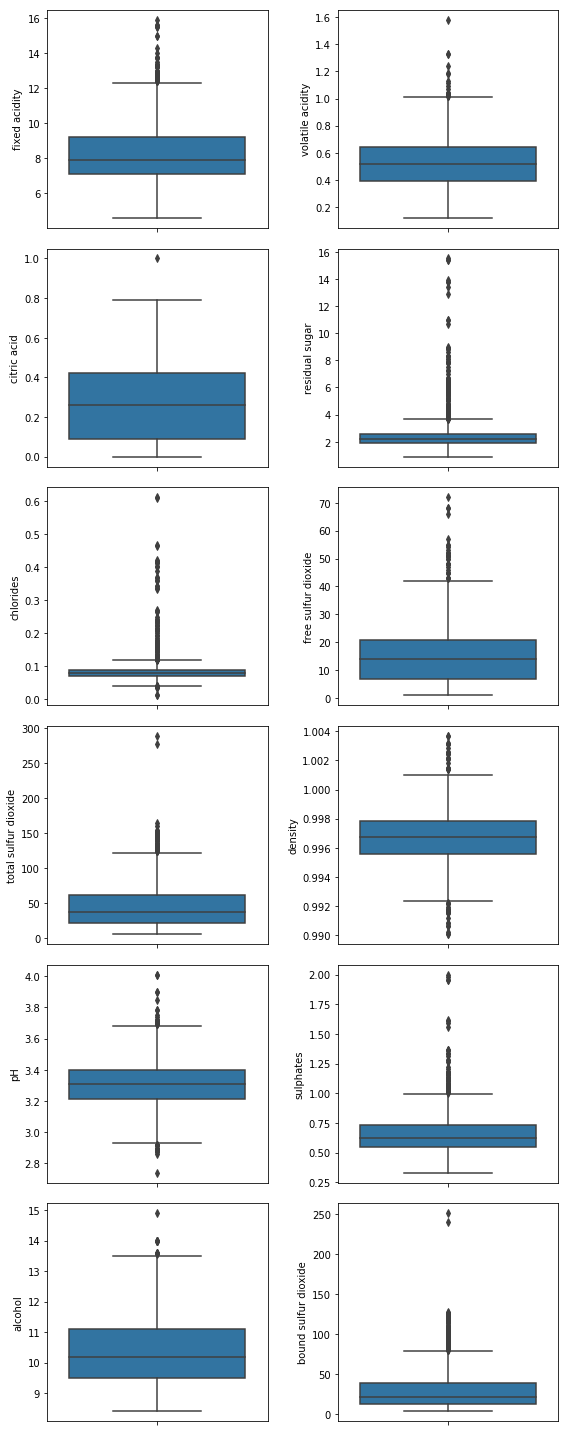

In [13]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize = (8,20))

plt.subplot(6,2,1)
sns.boxplot(red["fixed acidity"], orient = "v")

plt.subplot(6,2,2)
sns.boxplot(red["volatile acidity"], orient = "v")

plt.subplot(6,2,3)
sns.boxplot(red["citric acid"], orient = "v")

plt.subplot(6,2,4)
sns.boxplot(red["residual sugar"], orient = "v")

plt.subplot(6,2,5)
sns.boxplot(red["chlorides"], orient = "v")

plt.subplot(6,2,6)
sns.boxplot(red["free sulfur dioxide"], orient = "v")

plt.subplot(6,2,7)
sns.boxplot(red["total sulfur dioxide"], orient = "v")

plt.subplot(6,2,8)
sns.boxplot(red["density"], orient = "v")

plt.subplot(6,2,9)
sns.boxplot(red["pH"], orient = "v")

plt.subplot(6,2,10)
sns.boxplot(red["sulphates"], orient = "v")

plt.subplot(6,2,11)
sns.boxplot(red["alcohol"], orient = "v")

plt.subplot(6,2,12)
sns.boxplot(red["bound sulfur dioxide"], orient = "v")

fig.tight_layout()
plt.show()

We see some outliers in some of the variables.  
We won't remove these outliers because they may be important.

### 1. What is the relationship between the four measures of acidity?

Based on our knowledge of chemistry, acidic compounds have low pH levels.  

#### Volatile Acidity vs pH

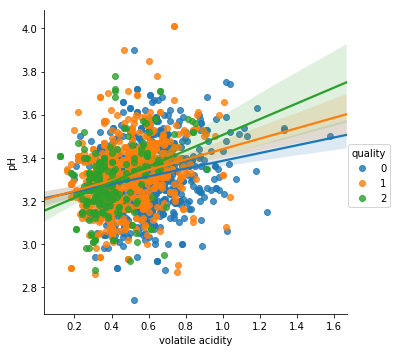

In [14]:
sns.lmplot('volatile acidity', 'pH',data = red, hue = 'quality')

#### Fixed Acidity vs pH

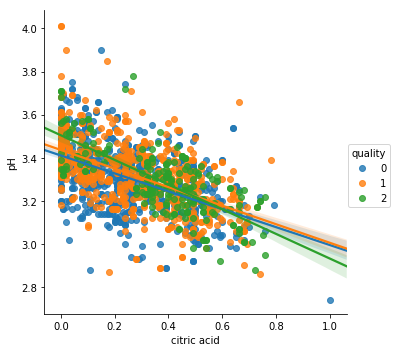

In [15]:
sns.lmplot('citric acid', 'pH',data = red, hue = 'quality')

#### Citric Acid vs pH

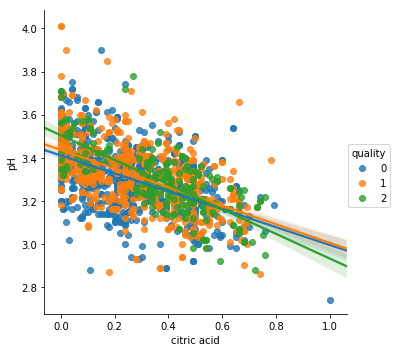

In [16]:
sns.lmplot('citric acid', 'pH',data = red, hue = 'quality')

Like our prediction, the increase in fixed acidity and citric acid decreased the pH level for all three qualities.  
However, volatile acidity had an opposite trend; pH level increased along with it.  
We believe that volatile acidity measures something different from actual acidity, explaining its positive relationship with pH.

#### Citric Acid vs Fixed Acidity

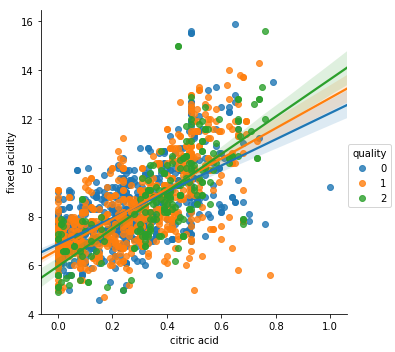

In [17]:
sns.lmplot('citric acid', 'fixed acidity',data = red, hue = 'quality')

We can see that citric acid and fixed acidity are strongly correlated for all three qualities.  
We believe that they both might explain each other in some sense.  

## 2. Is there a relationship between acidity and quality?

#### Acids are major components when it comes to wine taste.  
We want to see if there is a difference in acidity for the three measures of quality.  
We have three measurements of acidity - volatile acidity, fixed acidity, citric acid, and pH level.

#### Volatile Acidity

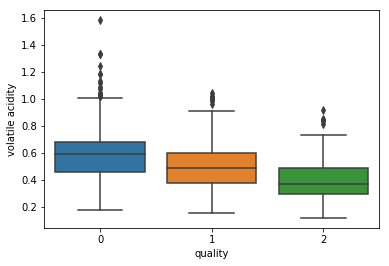

In [18]:
sns.boxplot('quality', 'volatile acidity',data = red)

#### Fixed Acidity

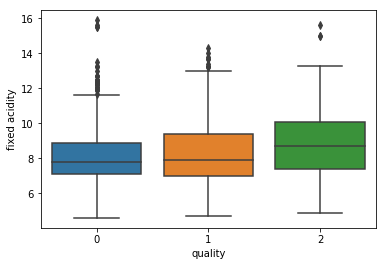

In [19]:
sns.boxplot('quality', 'fixed acidity', data = red)

#### Citric Acid

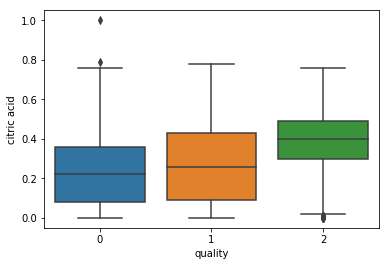

In [20]:
sns.boxplot('quality', 'citric acid', data = red)

#### pH Level

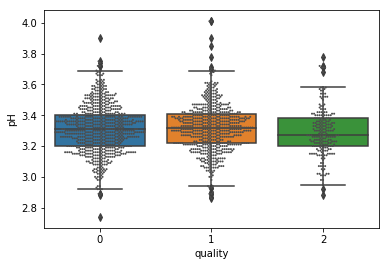

In [21]:
sns.boxplot('quality', 'pH', data = red)
sns.swarmplot(x="quality", y="pH", data=red,
              size=2, color=".3", linewidth=0)

From the above boxplots we can see that volatile acidity decreases as the quality of the wine increases.  
Both fixed acidity and citric acid increases as the quality of the wine increases.  
We don't see any significant difference between pH level and the three quality levels.  

### 3. Is there a relationship between alcohol and quality?
Alcohol was the strongest correlated variable with quality.  

#### Before seeing the relationship between alcohol and quality, we want to explore its relationship with density (R = -0.5) 

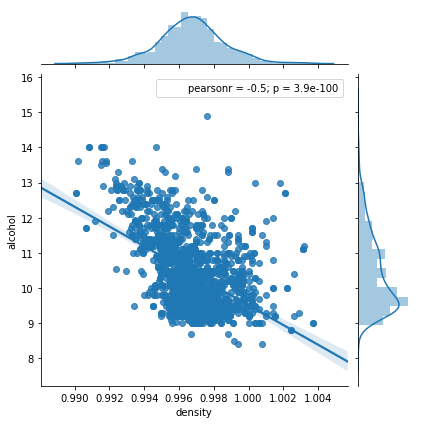

In [22]:
sns.jointplot('density', 'alcohol', data = red, kind="reg")
plt.show()

They are inversely correlated, we can see that there is a trend of an increase in density results in a decrease in alcohol.

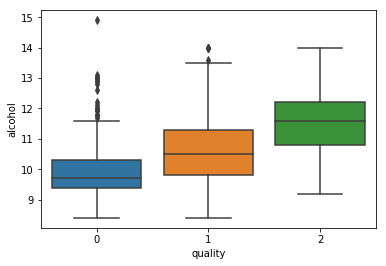

In [23]:
sns.boxplot('quality', 'alcohol', data = red)

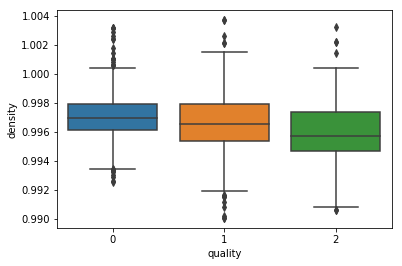

In [24]:
sns.boxplot('quality', 'density', data = red)

From the above barplot, we see that there is a significant increase in wine quality with an increase in alcohol.  
The trend continues to show in the barplot. The decrease in density increases wine quality, which is the opposite of alcohol.

### 4. Is there a relationship between sulfur dioxide and quality?

There are two types of sulfur dioxide - free and bound.

We will first explore the relationship between the two

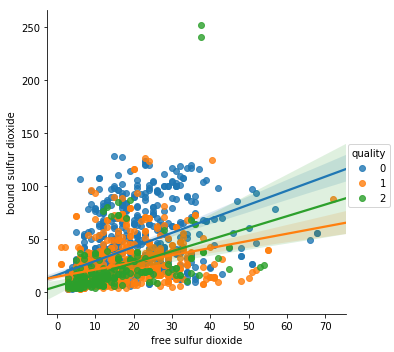

In [25]:
sns.lmplot('free sulfur dioxide', 'bound sulfur dioxide', hue = 'quality', data = red)

Based on the above graph, we can see that high quality wine have very low bound sulfur dioxide whereas low quality wine tends to have very high bound sulfur dioxide.  
As for free sulfur dioxide, it seems to be evenly spread out for the three qualities.  
We will further explore this using boxplots.  

#### Free Sulfur Dioxide

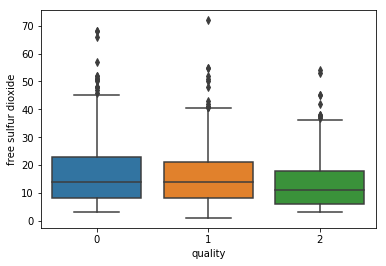

In [26]:
sns.boxplot('quality', 'free sulfur dioxide', data = red)

#### Bound Sulfur Dioxide

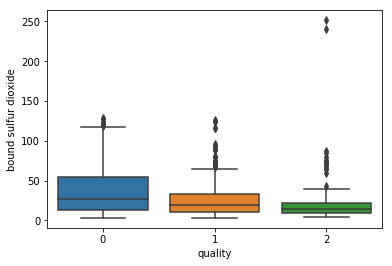

In [27]:
sns.boxplot('quality', 'bound sulfur dioxide', data = red)

Like what the scatterplot implied, a lower bound sulfur dioxide corresponded to higher quality wine.  
The relationship between free sulfur dioxide and quality doesn't seem to be too significant.  

### The rest: Sugar, Chlorides, Sulphates

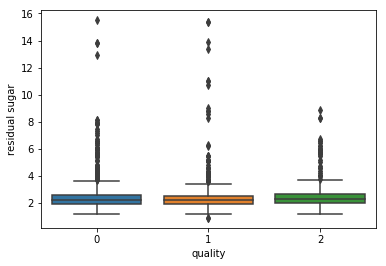

In [28]:
sns.boxplot('quality', 'residual sugar', data = red)

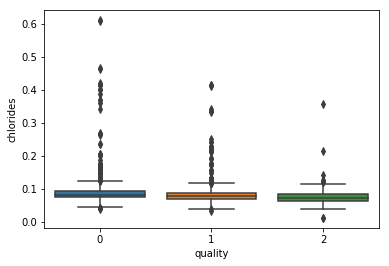

In [29]:
sns.boxplot('quality', 'chlorides', data = red)

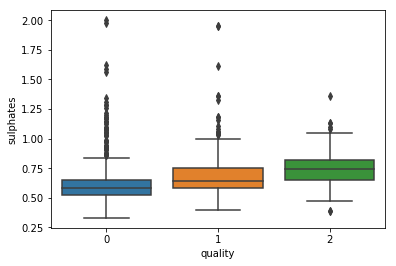

In [30]:
sns.boxplot('quality', 'sulphates', data = red)

Residual sugar and chlorides has a very small range for all three qualities with a lot of outliers.  
They don't seem to have a significant relationship with quality.   
We see that an increase in sulphate results in an increase in quality.   
From the remaining three variables, we will use sulphates for analysis purposes.   

# Modeling

Based on our exploratory data analysis, we believe that the variables volatile acidity, fixed acidity, alcohol, bound sulfur dioxide, and sulphates are physiochemical properties that may be significant in prediciting quality of red wine.  

In [31]:
red.columns = red.columns.str.replace('\s+', '_')
correlation = red[['volatile_acidity', 'fixed_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']].corr()
1/(1-correlation**2)

,volatile_acidity,fixed_acidity,alcohol,bound_sulfur_dioxide,sulphates
volatile_acidity,inf,1.070209,1.042666,1.009505,1.073093
fixed_acidity,1.070209,inf,1.003817,1.006145,1.034652
alcohol,1.042666,1.003817,inf,1.052431,1.008837
bound_sulfur_dioxide,1.009505,1.006145,1.052431,inf,1.001041
sulphates,1.073093,1.034652,1.008837,1.001041,inf


The VIF between all 5 predictors were low so we are safe to conclude that they are independent.

# Classification Model: Multinomial Regression

In [32]:
y = red.quality
x = sm.add_constant(red[['volatile_acidity', 'fixed_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])

### Run model with the chosen predictors

In [33]:
model = sm.MNLogit(y,x)
model_fit = model.fit()
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.770640
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                        MNLogit   Df Residuals:                     1587
Method:                           MLE   Df Model:                           10
Date:                Sat, 09 Jun 2018   Pseudo R-squ.:                  0.2244
Time:                        20:14:48   Log-Likelihood:                -1232.3
converged:                       True   LL-Null:                       -1588.8
                                        LLR p-value:                9.499e-147
========================================================================================
           quality=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.6769      0.926     -8.294      0.000      -9.491      -5.863
volatile_acidity        -2.5901      0.382     -6.773      0.000      -3.340      -1.841
fixed_acidity            0.0192      0.037      0.512      0.609      -0.054       0.093
alcohol                  0.7934      0.072     10.969      0.000       0.652       0.935
bound_sulfur_dioxide    -0.0150      0.002     -6.107      0.000      -0.020      -0.010
sulphates                1.7225      0.381      4.517      0.000       0.975       2.470
----------------------------------------------------------------------------------------
           quality=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -18.9290      1.493    -12.682      0.000     -21.854     -16.004
volatile_acidity        -5.3902      0.681     -7.920      0.000      -6.724      -4.056
fixed_acidity            0.1348      0.053      2.523      0.012       0.030       0.240
alcohol                  1.6084      0.106     15.139      0.000       1.400       1.817
bound_sulfur_dioxide    -0.0243      0.005     -4.827      0.000      -0.034      -0.014
sulphates                3.9867      0.558      7.146      0.000       2.893       5.080
========================================================================================
"""

Fixed acidity has a p-value > 0.05 and therefore we will remove this predictor in our final model.

### Final Predictors: Volatile Acidity, Alcohol, Bound Sulfur Dioxide, and Sulphates

In [34]:
x = sm.add_constant(red[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
model1 = sm.MNLogit(y,x)
model1_fit = model1.fit()
model1_fit.summary()

Optimization terminated successfully.
         Current function value: 0.772865
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                quality   No. Observations:                 1599
Model:                        MNLogit   Df Residuals:                     1589
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Jun 2018   Pseudo R-squ.:                  0.2222
Time:                        20:14:48   Log-Likelihood:                -1235.8
converged:                       True   LL-Null:                       -1588.8
                                        LLR p-value:                3.623e-147
========================================================================================
           quality=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4649      0.815     -9.158      0.000      -9.063      -5.867
volatile_acidity        -2.6404      0.372     -7.098      0.000      -3.369      -1.911
alcohol                  0.7896      0.072     11.011      0.000       0.649       0.930
bound_sulfur_dioxide    -0.0151      0.002     -6.149      0.000      -0.020      -0.010
sulphates                1.7442      0.380      4.585      0.000       0.999       2.490
----------------------------------------------------------------------------------------
           quality=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -17.1232      1.289    -13.285      0.000     -19.649     -14.597
volatile_acidity        -5.8057      0.662     -8.766      0.000      -7.104      -4.508
alcohol                  1.5600      0.104     15.064      0.000       1.357       1.763
bound_sulfur_dioxide    -0.0264      0.005     -5.316      0.000      -0.036      -0.017
sulphates                4.1618      0.550      7.573      0.000       3.085       5.239
========================================================================================
"""

#### In-Sample Prediction Accuracy

In [35]:
ypred = model1_fit.predict(x)
preds = np.array(ypred.idxmax(axis=1))

confusionmat=pd.crosstab(red['quality'], preds, rownames=['Actual Quality'], colnames=['Predicted Quality'])
confusionmat
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

0.6260162601626016

Our in-sample prediction accuracy is 62.60%.

### Cross Validation To Check Over-Fit

#### 5 Fold Cross Validation

In [36]:
#Randomly Shuffle Our Data
shuffled_red = red.sample(frac = 1)

#Split to 5 Testing
test1 = shuffled_red.iloc[0:320,:]
test2 = shuffled_red.iloc[320:640,:]
test3 = shuffled_red.iloc[640:960,:]
test4 = shuffled_red.iloc[960:1280,:]
test5 = shuffled_red.iloc[1280:,:]

#Test X
testx1 = sm.add_constant(test1[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
testx2 = sm.add_constant(test2[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
testx3 = sm.add_constant(test3[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
testx4 = sm.add_constant(test4[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
testx5 = sm.add_constant(test5[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])

#Test Y
testy1 = test1.quality
testy2 = test2.quality
testy3 = test3.quality
testy4 = test4.quality
testy5 = test5.quality

#Combine Testing to Create 5 Training
train1 = pd.concat([test2, test3, test4, test5])
train2 = pd.concat([test1, test3, test4, test5])
train3 = pd.concat([test1, test2, test4, test5])
train4 = pd.concat([test1, test2, test3, test5])
train5 = pd.concat([test1, test2, test3, test4])

#Train X
trainx1 = sm.add_constant(train1[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
trainx2 = sm.add_constant(train2[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
trainx3 = sm.add_constant(train3[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
trainx4 = sm.add_constant(train4[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
trainx5 = sm.add_constant(train5[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])

#Train Y
trainy1 = train1.quality
trainy2 = train2.quality
trainy3 = train3.quality
trainy4 = train4.quality
trainy5 = train5.quality

#### 1st Iteration

In [37]:
model1 = sm.MNLogit(trainy1,trainx1)
model1_fit = model1.fit()

ypred1 = model1_fit.predict(testx1)
ypred1 = np.array(ypred1.idxmax(axis = 1))

confusionmat=pd.crosstab(testy1, ypred1, rownames=['Actual Quality'], colnames=['Predicted Quality'])
print(confusionmat)
confusionmat1 = confusionmat.copy()
cvval1=(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

Optimization terminated successfully.
         Current function value: 0.776416
         Iterations 7
Predicted Quality    0   1   2
Actual Quality                
0                  123  26   0
1                   56  58  10
2                    0  34  13


0.60625

#### 2nd Iteration

In [38]:
model2 = sm.MNLogit(trainy2,trainx2)
model2_fit = model2.fit()

ypred2 = model2_fit.predict(testx2)
ypred2 = np.array(ypred2.idxmax(axis = 1))

confusionmat=pd.crosstab(testy2, ypred2, rownames=['Actual Quality'], colnames=['Predicted Quality'])
print(confusionmat)
confusionmat2 = confusionmat.copy()
cvval2=(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

Optimization terminated successfully.
         Current function value: 0.788520
         Iterations 7
Predicted Quality    0   1   2
Actual Quality                
0                  124  31   1
1                   35  76  13
2                    0  23  17


0.678125

#### 3rd Iteration

In [39]:
model3 = sm.MNLogit(trainy3,trainx3)
model3_fit = model3.fit()

ypred3 = model3_fit.predict(testx3)
ypred3 = np.array(ypred3.idxmax(axis = 1))

confusionmat=pd.crosstab(testy3, ypred3, rownames=['Actual Quality'], colnames=['Predicted Quality'])
print(confusionmat)
confusionmat3 = confusionmat.copy()
cvval3=(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

Optimization terminated successfully.
         Current function value: 0.759227
         Iterations 8
Predicted Quality    0   1   2
Actual Quality                
0                  108  45   1
1                   49  66   5
2                    4  27  15


0.590625

#### 4th Iteration

In [40]:
model4 = sm.MNLogit(trainy4,trainx4)
model4_fit = model4.fit()

ypred4 = model4_fit.predict(testx4)
ypred4 = np.array(ypred4.idxmax(axis = 1))

confusionmat=pd.crosstab(testy4, ypred4, rownames=['Actual Quality'], colnames=['Predicted Quality'])
print(confusionmat)
confusionmat4 = confusionmat.copy()
cvval4=(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

Optimization terminated successfully.
         Current function value: 0.768750
         Iterations 8
Predicted Quality    0   1   2
Actual Quality                
0                  105  30   0
1                   57  81   8
2                    6  21  12


0.61875

#### 5th Iteration

In [41]:
model5 = sm.MNLogit(trainy5,trainx5)
model5_fit = model5.fit()

ypred5 = model5_fit.predict(testx5)
ypred5 = np.array(ypred5.idxmax(axis = 1))

confusionmat=pd.crosstab(testy5, ypred5, rownames=['Actual Quality'], colnames=['Predicted Quality'])
print(confusionmat)
confusionmat5 = confusionmat.copy()
cvval5=(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

Optimization terminated successfully.
         Current function value: 0.767109
         Iterations 8
Predicted Quality    0   1   2
Actual Quality                
0                  110  39   1
1                   44  69  11
2                    4  30  11


0.5956112852664577

#### Cross Validation: Final Mean Accuracy

In [42]:
(cvval1+cvval2+cvval3+cvval4+cvval5)/5

0.6178722570532915

Our cross validation mean accuracy was 62.29% and our in-sample accuracy was 62.60% so the model seems to be valid.  
We will use this model for our final prediction.  

### Prediction using Multinomial Logistic Regression

Split Training (75%) and Testing (25%)

In [43]:
red['is_train'] = np.random.uniform(0, 1, len(red)) <= .75
train, test = red[red['is_train']==True], red[red['is_train']==False]

In [44]:
y = train['quality']
x = sm.add_constant(train[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])

finalmodel = sm.MNLogit(y,x)
finalmodel_fit = finalmodel.fit()

Optimization terminated successfully.
         Current function value: 0.766861
         Iterations 8


In [45]:
x = sm.add_constant(test[['volatile_acidity', 'alcohol', 'bound_sulfur_dioxide', 'sulphates']])
ypred = finalmodel_fit.predict(x)
ypred
preds = np.array(ypred.idxmax(axis=1))
confusionmat=pd.crosstab(test['quality'], preds, rownames=['Actual Quality'], colnames=['Predicted Quality'])
confusionmat
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

0.6275

We have a final accuracy of 64.05%.

# Classification Model: Random Forest

In [46]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#### Reduced Model: The same four predictors as our multinomial logistic regression

In [47]:
features = ['volatile_acidity','alcohol','bound_sulfur_dioxide','sulphates']

In [48]:
clf.fit(train[features], train.quality)
preds = clf.predict(test[features])
confusionmat=pd.crosstab(test['quality'], preds, rownames=['Actual Quality'], colnames=['Predicted Quality'])
confusionmat
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

0.6775

In [49]:
list(zip(train[features], clf.feature_importances_))

[('volatile_acidity', 0.2500451717844714),
 ('alcohol', 0.2831974626212956),
 ('bound_sulfur_dioxide', 0.23027409144591404),
 ('sulphates', 0.23648327414831888)]

In [50]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'bound_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [51]:
clf.fit(train[features], train.quality)
preds = clf.predict(test[features])
confusionmat=pd.crosstab(test['quality'], preds, rownames=['Actual Quality'], colnames=['Predicted Quality'])
confusionmat
(confusionmat[0][0] + confusionmat[1][1] + confusionmat[2][2]) / confusionmat.sum().sum()

0.6625

http://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
